In [18]:
import numpy as np
import matplotlib.pyplot as plt

Generating a 3D dataset

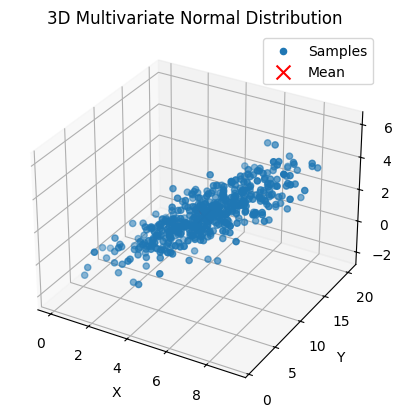

In [19]:
data = np.random.multivariate_normal(
    mean=[5, 10, 2],
    cov=[[3, 2, 2], [2, 10, 1], [2, 1, 2]],
    size=500
    )

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data[:, 0], data[:, 1], data[:, 2], label='Samples')

ax.scatter(5, 10, 2, color='red', s=100, marker='x', label='Mean')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Multivariate Normal Distribution')
ax.legend()

plt.show()

And performing PCA on it

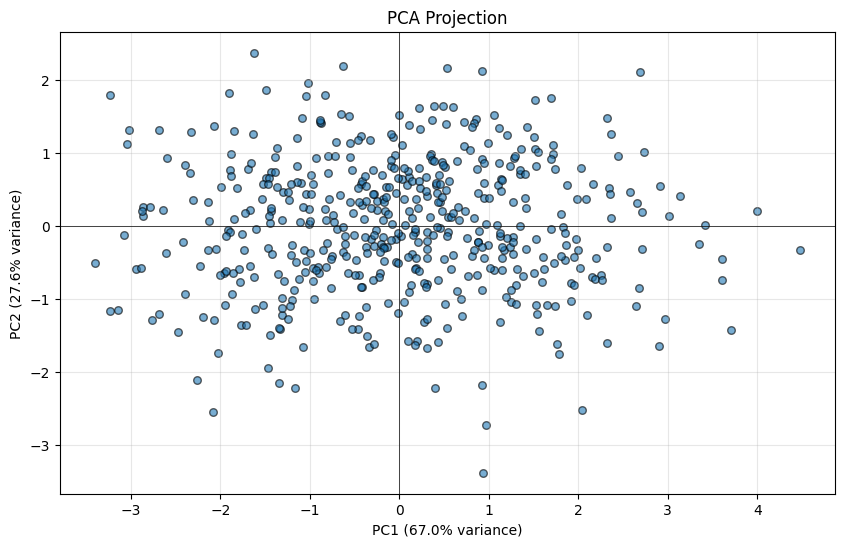

In [20]:
# Step 1: Standardize the data
mean = np.mean(data, axis=0)
std_dev = np.std(data, axis=0)
data_standardized = (data - mean) / std_dev

cov_matrix = np.cov(data_standardized.T)

eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues_sorted = eigenvalues[sorted_indices]
eigenvectors_sorted = eigenvectors[:, sorted_indices]

n_pc = 2
principal_components = eigenvectors_sorted[:, :n_pc]
projected_data = np.dot(data_standardized, principal_components)

# Plotting the PCA results just for myself, ilustrative reasons
plt.figure(figsize=(10, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.6, edgecolors='k', s=30)
plt.xlabel(f'PC1 ({eigenvalues_sorted[0]/np.sum(eigenvalues_sorted)*100:.1f}% variance)')
plt.ylabel(f'PC2 ({eigenvalues_sorted[1]/np.sum(eigenvalues_sorted)*100:.1f}% variance)')
plt.title('PCA Projection')
plt.grid(True, alpha=0.3)
plt.axhline(y=0, color='k', linewidth=0.5)
plt.axvline(x=0, color='k', linewidth=0.5)
plt.show()

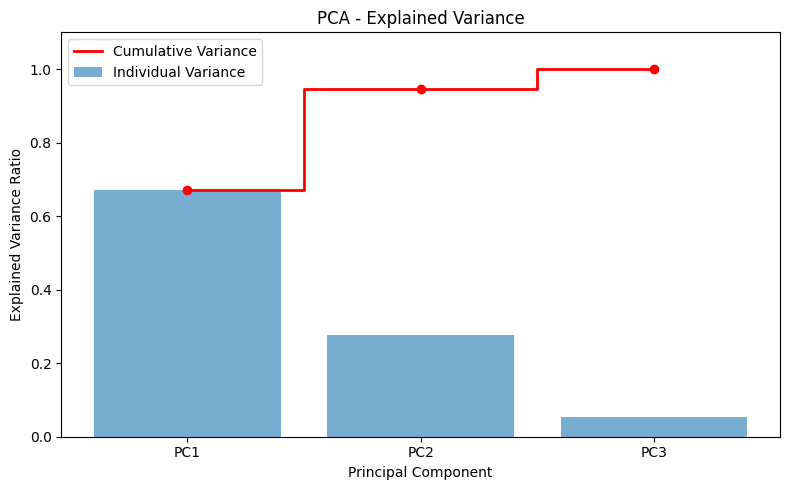

Individual variance: [0.67011576 0.27580761 0.05407663]
Cumulative variance: [0.67011576 0.94592337 1.        ]


In [21]:
n_total_components = eigenvalues_sorted.shape[0]

explained_variance = eigenvalues_sorted / np.sum(eigenvalues_sorted)
cumulative_variance = np.cumsum(explained_variance)

fig, ax = plt.subplots(figsize=(8, 5))

x = np.arange(1, n_total_components + 1)
ax.bar(x, explained_variance, alpha=0.6, label='Individual Variance')
ax.step(x, cumulative_variance, where='mid', color='red', linewidth=2, label='Cumulative Variance')
ax.scatter(x, cumulative_variance, color='red', zorder=3)
ax.set_xlabel('Principal Component')
ax.set_ylabel('Explained Variance Ratio')
ax.set_title('PCA - Explained Variance')
ax.set_xticks(x)
ax.set_xticklabels([f'PC{i}' for i in x])
ax.legend()
ax.set_ylim(0, 1.1)

plt.tight_layout()
plt.show()

print("Individual variance:", explained_variance)
print("Cumulative variance:", cumulative_variance)

Threshold: 2.1074
Predicted outliers: 50
Contamination rate: 0.1000


/tmp/ipykernel_22213/2139239377.py:21: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(projected_data_alt[y_pred == 1, 0], projected_data_alt[y_pred == 1, 1],


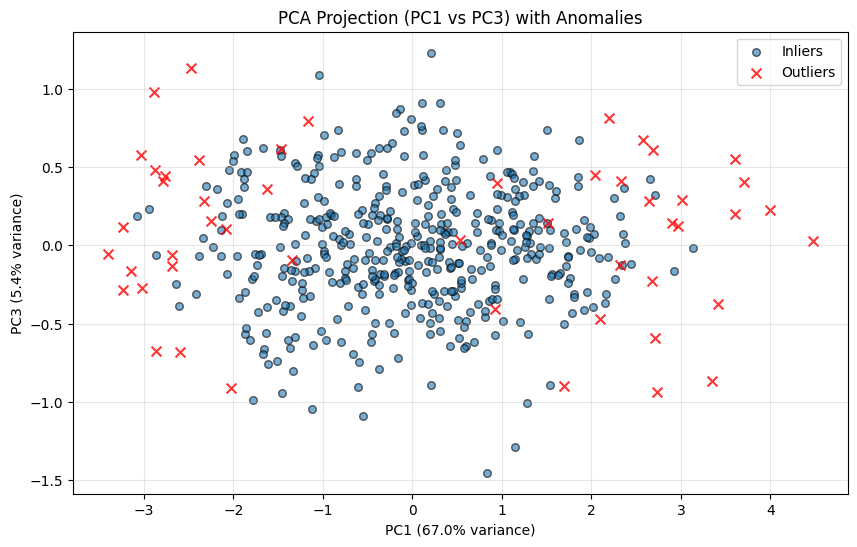

/tmp/ipykernel_22213/2139239377.py:34: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(projected_data[y_pred == 1, 0], projected_data[y_pred == 1, 1],


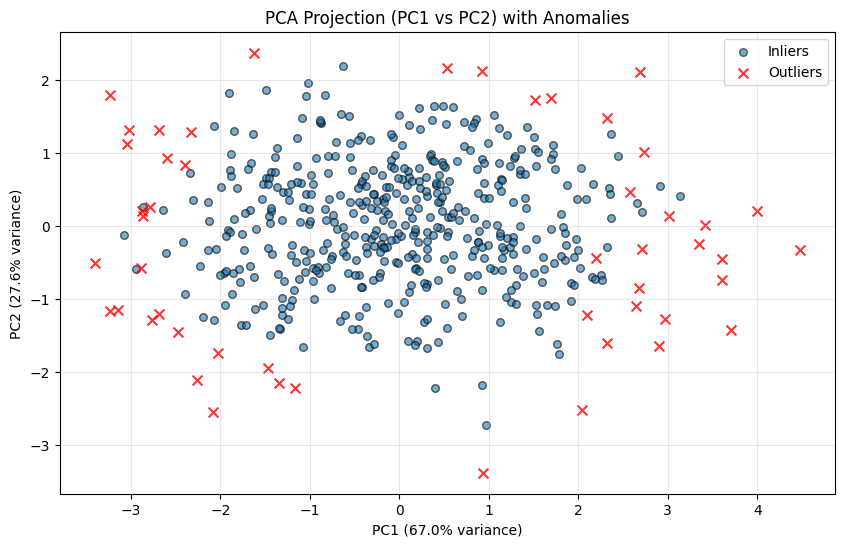

In [22]:
contamination = .1
z_score = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
z_aggr = np.max(np.abs(z_score), axis=1)

threshold = np.quantile(z_aggr, 1 - contamination)

y_pred = (z_aggr > threshold).astype(int)

print(f"Threshold: {threshold:.4f}")
print(f"Predicted outliers: {np.sum(y_pred)}")
print(f"Contamination rate: {np.sum(y_pred) / len(y_pred):.4f}")

# Project data onto PC1 and PC3
principal_components_alt = eigenvectors_sorted[:, [0, 2]]  # PC1 and PC3
projected_data_alt = np.dot(data_standardized, principal_components_alt)

# Visualize outliers in PC1 vs PC3 space
plt.figure(figsize=(10, 6))
plt.scatter(projected_data_alt[y_pred == 0, 0], projected_data_alt[y_pred == 0, 1], 
           alpha=0.6, label='Inliers', edgecolors='k', s=30)
plt.scatter(projected_data_alt[y_pred == 1, 0], projected_data_alt[y_pred == 1, 1], 
           alpha=0.8, color='red', label='Outliers', edgecolors='k', s=50, marker='x')
plt.xlabel(f'PC1 ({eigenvalues_sorted[0]/np.sum(eigenvalues_sorted)*100:.1f}% variance)')
plt.ylabel(f'PC3 ({eigenvalues_sorted[2]/np.sum(eigenvalues_sorted)*100:.1f}% variance)')
plt.title('PCA Projection (PC1 vs PC3) with Anomalies')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Visualize outliers in PC1 vs PC2 space
plt.figure(figsize=(10, 6))
plt.scatter(projected_data[y_pred == 0, 0], projected_data[y_pred == 0, 1], 
           alpha=0.6, label='Inliers', edgecolors='k', s=30)
plt.scatter(projected_data[y_pred == 1, 0], projected_data[y_pred == 1, 1], 
           alpha=0.8, color='red', label='Outliers', edgecolors='k', s=50, marker='x')
plt.xlabel(f'PC1 ({eigenvalues_sorted[0]/np.sum(eigenvalues_sorted)*100:.1f}% variance)')
plt.ylabel(f'PC2 ({eigenvalues_sorted[1]/np.sum(eigenvalues_sorted)*100:.1f}% variance)')
plt.title('PCA Projection (PC1 vs PC2) with Anomalies')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

Mahalanobis Threshold: 2.5418
Predicted outliers (Mahalanobis): 50
Contamination rate: 0.1000


/tmp/ipykernel_22213/2953848689.py:19: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(projected_data[y_pred_mahal == 1, 0], projected_data[y_pred_mahal == 1, 1],


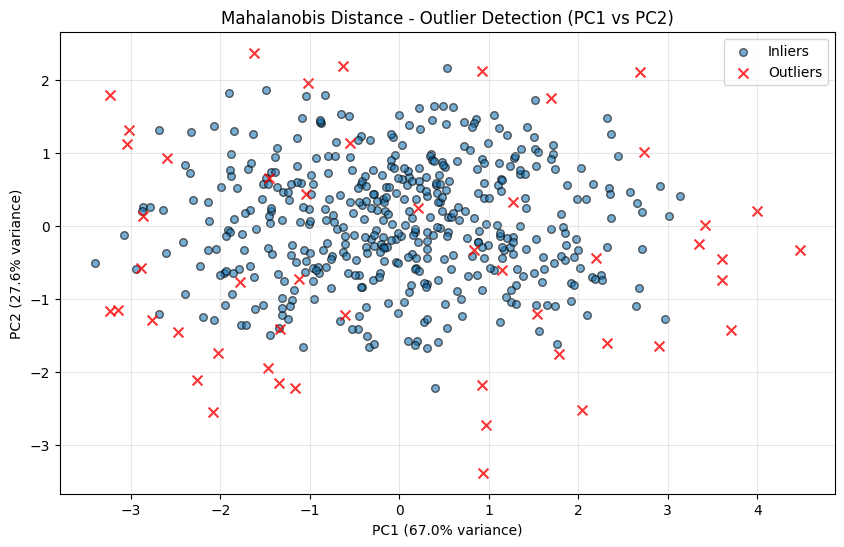

/tmp/ipykernel_22213/2953848689.py:32: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(projected_data_alt[y_pred_mahal == 1, 0], projected_data_alt[y_pred_mahal == 1, 1],


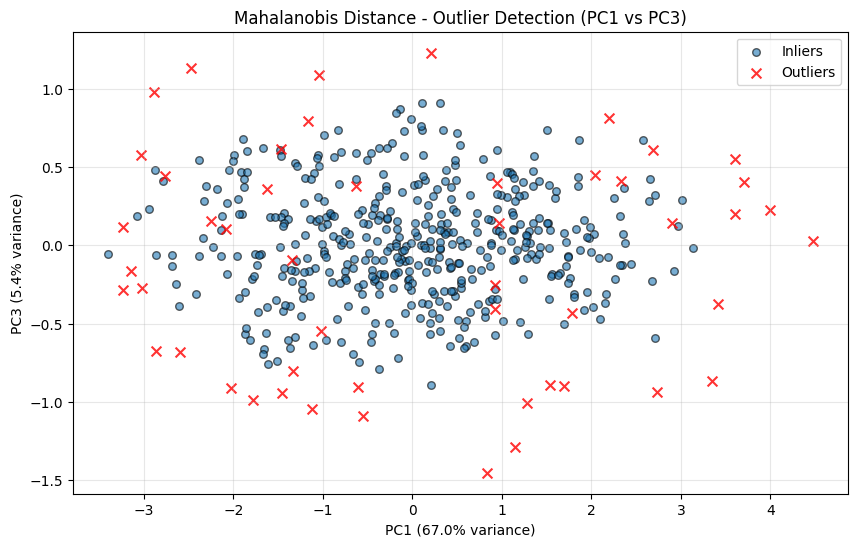

In [23]:
principal_components_all = eigenvectors_sorted[:, :n_total_components]
projected_data_all = np.dot(data_standardized, principal_components_all)

centroid = np.mean(projected_data_all, axis=0)
std_pc = np.std(projected_data_all, axis=0)

normalized_distances = np.sqrt(np.sum(((projected_data_all - centroid) / std_pc) ** 2, axis=1))
threshold_mahal = np.quantile(normalized_distances, 1 - contamination)
y_pred_mahal = (normalized_distances > threshold_mahal).astype(int)

print(f"Mahalanobis Threshold: {threshold_mahal:.4f}")
print(f"Predicted outliers (Mahalanobis): {np.sum(y_pred_mahal)}")
print(f"Contamination rate: {np.sum(y_pred_mahal) / len(y_pred_mahal):.4f}")

# Visualize in PC1 vs PC2 space
plt.figure(figsize=(10, 6))
plt.scatter(projected_data[y_pred_mahal == 0, 0], projected_data[y_pred_mahal == 0, 1], 
           alpha=0.6, label='Inliers', edgecolors='k', s=30)
plt.scatter(projected_data[y_pred_mahal == 1, 0], projected_data[y_pred_mahal == 1, 1], 
           alpha=0.8, color='red', label='Outliers', edgecolors='k', s=50, marker='x')
plt.xlabel(f'PC1 ({eigenvalues_sorted[0]/np.sum(eigenvalues_sorted)*100:.1f}% variance)')
plt.ylabel(f'PC2 ({eigenvalues_sorted[1]/np.sum(eigenvalues_sorted)*100:.1f}% variance)')
plt.title('Mahalanobis Distance - Outlier Detection (PC1 vs PC2)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Visualize in PC1 vs PC3 space
plt.figure(figsize=(10, 6))
plt.scatter(projected_data_alt[y_pred_mahal == 0, 0], projected_data_alt[y_pred_mahal == 0, 1], 
           alpha=0.6, label='Inliers', edgecolors='k', s=30)
plt.scatter(projected_data_alt[y_pred_mahal == 1, 0], projected_data_alt[y_pred_mahal == 1, 1], 
           alpha=0.8, color='red', label='Outliers', edgecolors='k', s=50, marker='x')
plt.xlabel(f'PC1 ({eigenvalues_sorted[0]/np.sum(eigenvalues_sorted)*100:.1f}% variance)')
plt.ylabel(f'PC3 ({eigenvalues_sorted[2]/np.sum(eigenvalues_sorted)*100:.1f}% variance)')
plt.title('Mahalanobis Distance - Outlier Detection (PC1 vs PC3)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()